# Computational Molecular Representation

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/acetylcholinesterase-QSAR/notebooks/2-Molecular-Representation-Sanitization.ipynb)

## 1. Import Libraries

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 51.5 MB/s eta 0:00:00


In [2]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00


In [66]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import GraphDescriptors
from rdkit.Chem import RDKFingerprint
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import MACCSkeys
import mols2grid
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Molecular Representation Examples

1. MDL molfile (.mol)
2. SYBYL MOL2 (.mol2)
3. SMILES (.smi)
4. Structure Data File (SDF) (.sdf)
5. IUPAC International Chemical Identifier (InChI)
6. InChiKey

### 2.1 MDL molfile

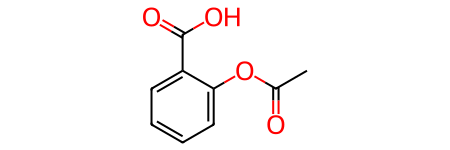

In [11]:
aspirin = Chem.MolFromMolFile('/content/aspirin.mol')
aspirin

### 2.2 SDF file

#### 2.2.1 As SDF supplier

In [10]:
aspirin_supplier = Chem.SDMolSupplier('/content/aspirin.sdf')
aspirin_supplier

#### 2.2.2 As DataFrame

PUBCHEM_COMPOUND_CID PUBCHEM_COMPOUND_CANONICALIZED  \
0                 2244                              1   

  PUBCHEM_CACTVS_COMPLEXITY PUBCHEM_CACTVS_HBOND_ACCEPTOR  \
0                       212                             4   

  PUBCHEM_CACTVS_HBOND_DONOR PUBCHEM_CACTVS_ROTATABLE_BOND  \
0                          1                             3   

                             PUBCHEM_CACTVS_SUBSKEYS  \
0  AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAA...   

  PUBCHEM_IUPAC_OPENEYE_NAME   PUBCHEM_IUPAC_CAS_NAME  \
0      2-acetoxybenzoic acid  2-acetyloxybenzoic acid   

  PUBCHEM_IUPAC_NAME_MARKUP  ... PUBCHEM_ATOM_UDEF_STEREO_COUNT  \
0   2-acetyloxybenzoic acid  ...                              0   

  PUBCHEM_BOND_DEF_STEREO_COUNT PUBCHEM_BOND_UDEF_STEREO_COUNT  \
0                             0                              0   

  PUBCHEM_ISOTOPIC_ATOM_COUNT PUBCHEM_COMPONENT_COUNT  \
0                           0                       1   

  PUBCHEM_CACTVS_TAUTO_COUNT PUBCHEM_COORDINATE_TYPE  \
0                         -1               1\n5\n255   

                             PUBCHEM_BONDANNOTATIONS    ID  \
0  5  6  8\n5  7  8\n6  8  8\n7  9  8\n8  10  8\n...  2244   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x783eae1545f0>  

[1 rows x 36 columns]
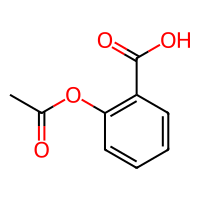

In [12]:
aspirin_df = PandasTools.LoadSDF('/content/aspirin.sdf', molColName = 'Molecule')
aspirin_df

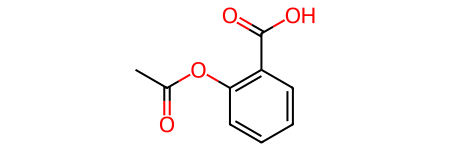

In [19]:
aspirin_df['Molecule'][0]

In [68]:
Draw.MolToFile(aspirin_df['Molecule'][0], 'aspirin.png')

#### 2.2.3 Mol to SMILES

In [18]:
smiles_aspirin = Chem.MolToSmiles(aspirin_df['Molecule'][0])
smiles_aspirin

'CC(=O)Oc1ccccc1C(=O)O'

## 3. Import Data

### 3.1 SMILES file

#### 3.1.1 As DataFrame with pd.read_csv

In [129]:
# Reading the SMILES file into a DataFrame
mol_df = pd.read_csv('/content/data_labelled.smi', delimiter = '\t', header=None)
mol_df

0                                                  1
0     CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...
1     CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
2     CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...
3     CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl
4     CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
...             ...                                                ...
5729   CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...
5730   CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2
5731  CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...
5732  CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...
5733   CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C

[5734 rows x 2 columns]

In [130]:
columns_names = ['CHEMBL', 'SMILES']

In [131]:
mol_df.columns = columns_names

In [132]:
mol_df

CHEMBL                                             SMILES
0     CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...
1     CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
2     CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...
3     CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl
4     CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1
...             ...                                                ...
5729   CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...
5730   CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2
5731  CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...
5732  CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...
5733   CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C

[5734 rows x 2 columns]

In [133]:
mol_list = [Chem.MolFromSmiles(mol) for mol in mol_df['SMILES']]

In [134]:
mol_list[:10]

In [135]:
mol_df['Molecule'] = mol_df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

In [136]:
mol_df

CHEMBL                                             SMILES  \
0     CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1     CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2     CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3     CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4     CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...             ...                                                ...   
5729   CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730   CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731  CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732  CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733   CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

                                              Molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x783eaaa91230>  
1     <rdkit.Chem.rdchem.Mol object at 0x783eaaa912a0>  
2     <rdkit.Chem.rdchem.Mol object at 0x783eaaa91310>  
3     <rdkit.Chem.rdchem.Mol object at 0x783eaaa91380>  
4     <rdkit.Chem.rdchem.Mol object at 0x783eaaa913f0>  
...                                                ...  
5729  <rdkit.Chem.rdchem.Mol object at 0x783ead775460>  
5730  <rdkit.Chem.rdchem.Mol object at 0x783ead7754d0>  
5731  <rdkit.Chem.rdchem.Mol object at 0x783ead775540>  
5732  <rdkit.Chem.rdchem.Mol object at 0x783ead7755b0>  
5733  <rdkit.Chem.rdchem.Mol object at 0x783ead775620>  

[5734 rows x 3 columns]

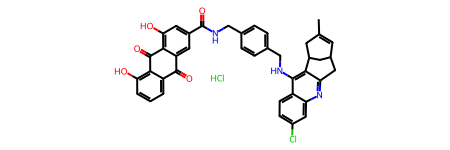

In [137]:
mol_df['Molecule'][0]

#### 3.2.1 As a mol_list

In [138]:
# Read the SMILES file line by line
with open('/content/data_labelled.smi', 'r') as file:
    lines = file.readlines()

In [139]:
# Extract SMILES strings and convert to Mol objects
mol_list = []
for line in lines:
    parts = line.split('\t')  # Splitting each line by the tab character
    if len(parts) > 1:  # Making sure the line has at least two parts
        smiles = parts[1]
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            mol_list.append(mol)

In [140]:
len(mol_list)

5734

### 3.2 From csv file

In [194]:
mol_df = pd.read_csv('/content/data_class_active_inactive.csv')
mol_df

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3         CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732      CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733       CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

         class  Label     pIC50  
0       active      1 -1.260071  
1       active      1  0.387216  
2       active      1 -1.903090  
3     inactive      0 -6.008600  
4       active      1 -2.250420  
...        ...    ...       ...  
5729    active      1 -0.262451  
5730    active      1 -3.230449  
5731    active      1 -2.714330  
5732  inactive      0 -5.000000  
5733    active      1 -1.913814  

[5734 rows x 5 columns]

In [195]:
mol_df['Molecule'] = mol_df['canonical_smiles'].apply(lambda x: Chem.MolFromSmiles(x))
mol_df

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3         CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732      CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733       CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

         class  Label     pIC50  \
0       active      1 -1.260071   
1       active      1  0.387216   
2       active      1 -1.903090   
3     inactive      0 -6.008600   
4       active      1 -2.250420   
...        ...    ...       ...   
5729    active      1 -0.262451   
5730    active      1 -3.230449   
5731    active      1 -2.714330   
5732  inactive      0 -5.000000   
5733    active      1 -1.913814   

                                              Molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x783ea9953f40>  
1     <rdkit.Chem.rdchem.Mol object at 0x783ea9910270>  
2     <rdkit.Chem.rdchem.Mol object at 0x783ea9910200>  
3     <rdkit.Chem.rdchem.Mol object at 0x783ea99104a0>  
4     <rdkit.Chem.rdchem.Mol object at 0x783ea9910510>  
...                                                ...  
5729  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aac00>  
5730  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab90>  
5731  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab20>  
5732  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaab0>  
5733  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaa40>  

[5734 rows x 6 columns]

In [196]:
mol_df['pIC50'].dtypes

dtype('float64')

## 4. Visualization

In [197]:
mols2grid.display(mol_df, smiles_col = 'SMILES', mol_col = 'Molecule',
                  subset = ['Label', 'class', 'pIC50'],
                  transform={"pIC50": lambda x: f"{x:.2f}"})

MolGridWidget()

## 5. Sanitization

### 5.1 RDKit

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


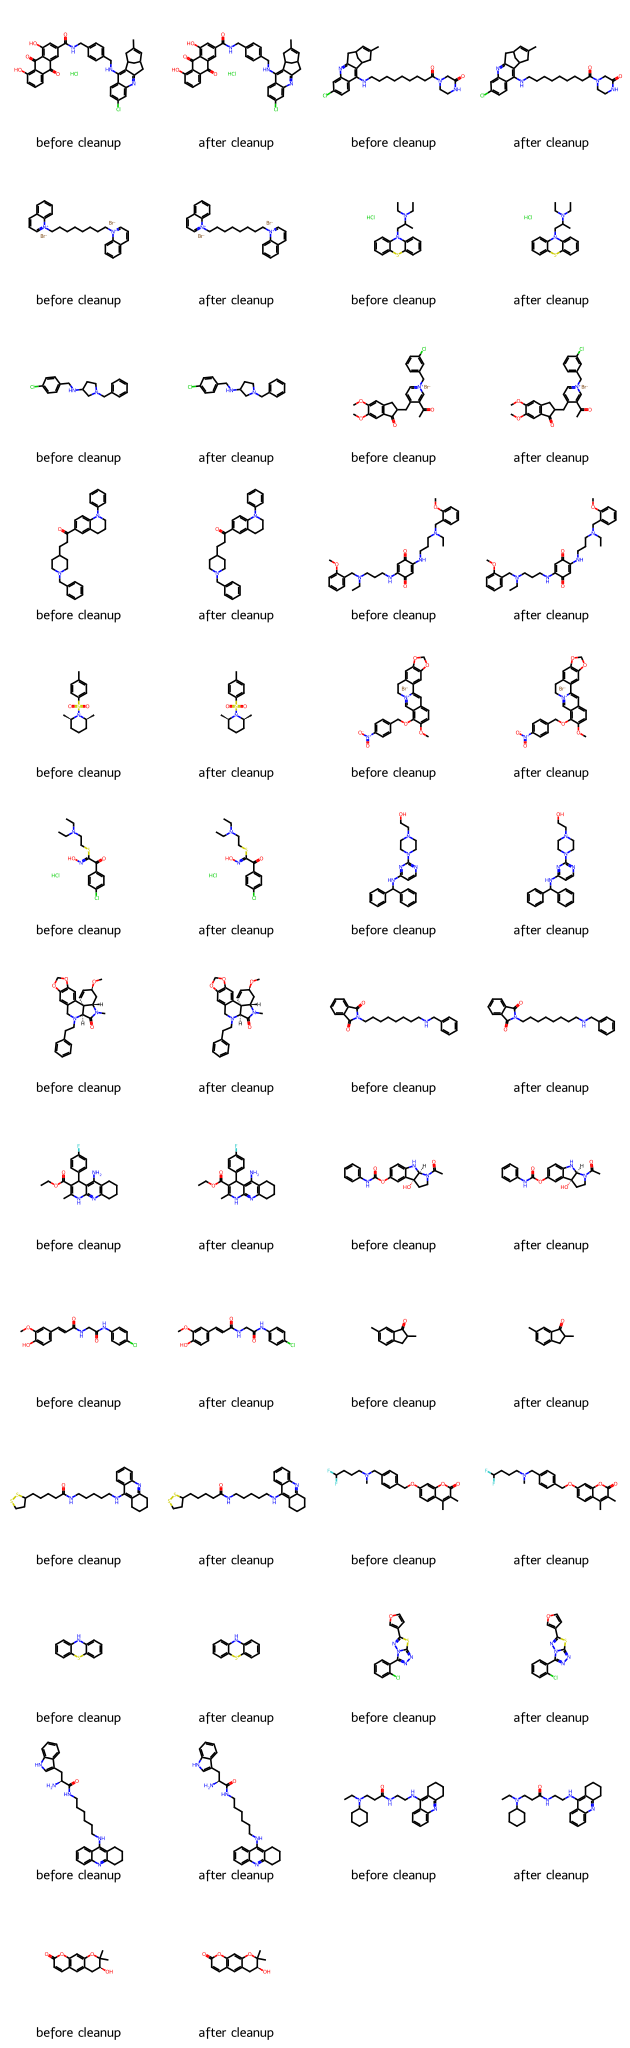

In [198]:
#Cleanup
cleanup = []
cleanup_legends = []

for smiles in mol_df['canonical_smiles']:
    mol = Chem.MolFromSmiles(smiles)
    mol_norm = rdMolStandardize.Cleanup(mol)
    cleanup.extend([mol, mol_norm])
    cleanup_legends.extend(['before cleanup', 'after cleanup'])

Draw.MolsToGridImage(cleanup, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=cleanup_legends)

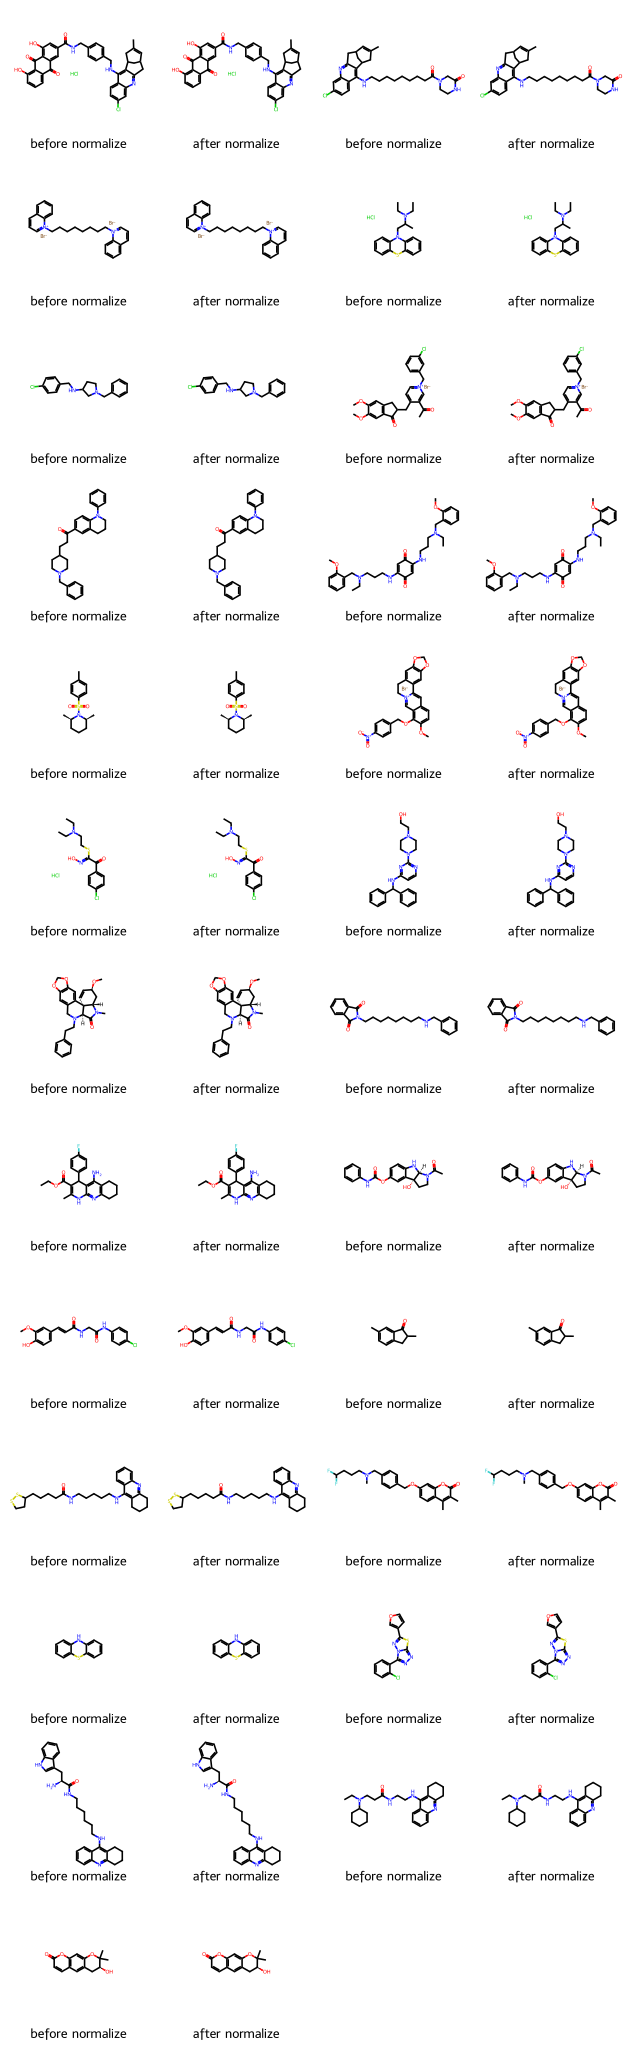

In [199]:
#Normalize
normalize = []
norm_legends = []

# Only neutralize the 'after cleanup’ molecules
for i in range(1, len(cleanup), 2): # Start at index 1 and skip every other molecule
    mol_cleanup = cleanup[i] # This is the 'after normalize' molecule
    mol_norm = rdMolStandardize.Normalize(mol_cleanup)
    normalize.extend([mol_cleanup, mol_norm])
    norm_legends.extend(['before normalize', 'after normalize'])

Draw.MolsToGridImage(normalize, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=norm_legends)

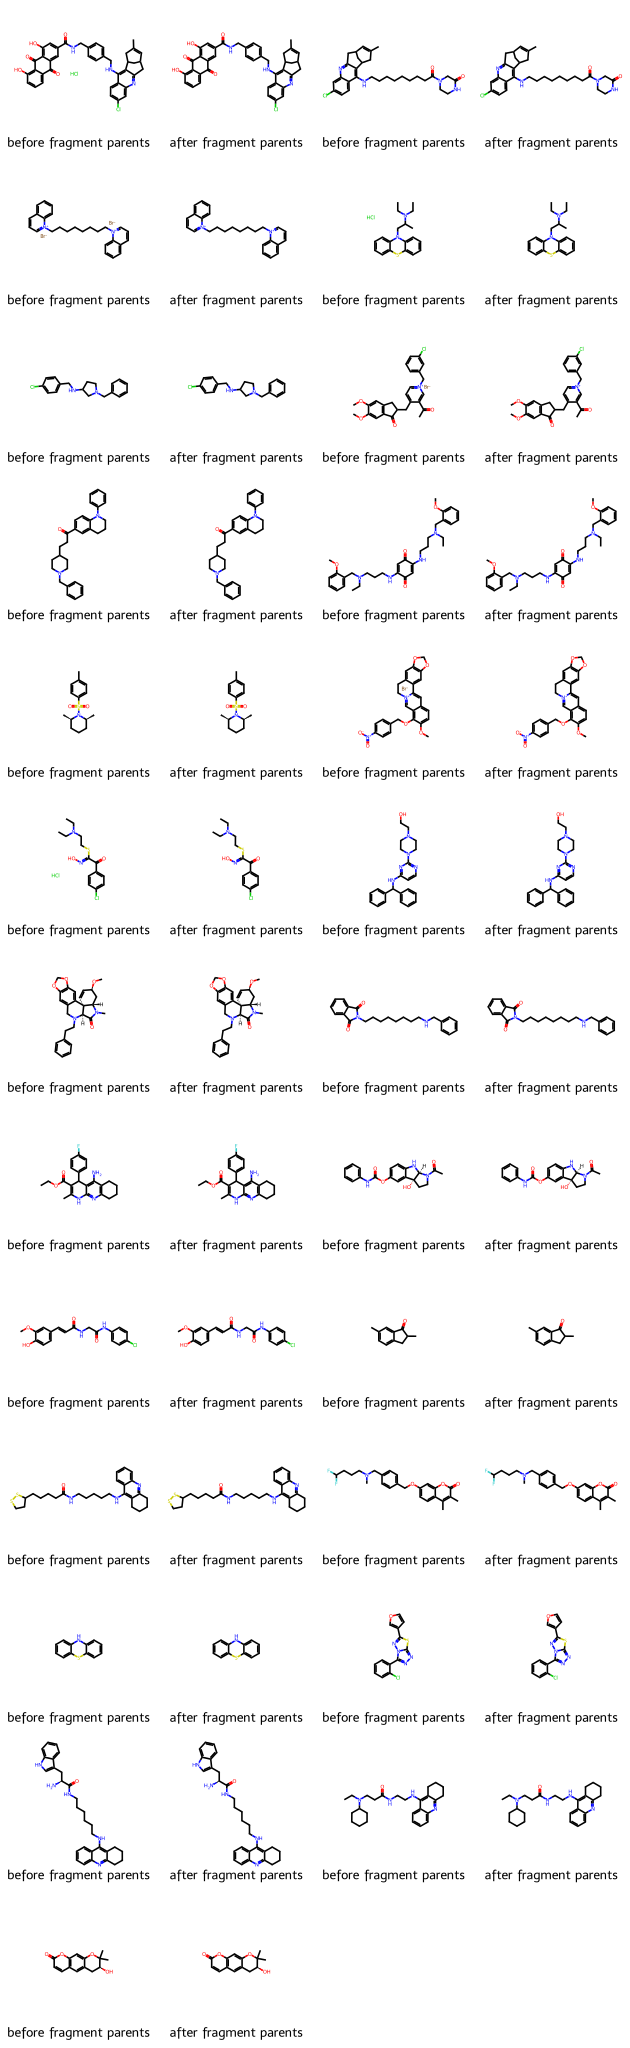

In [200]:
#Fragment Parents
fragment_parents = []
fragm_legends = []

for i in range(1, len(normalize), 2):
    mol_norm = normalize[i]
    mol_frag = rdMolStandardize.FragmentParent(mol_norm)
    fragment_parents.extend([mol_norm, mol_frag])
    fragm_legends.extend(['before fragment parents', 'after fragment parents'])

Draw.MolsToGridImage(fragment_parents, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=fragm_legends)

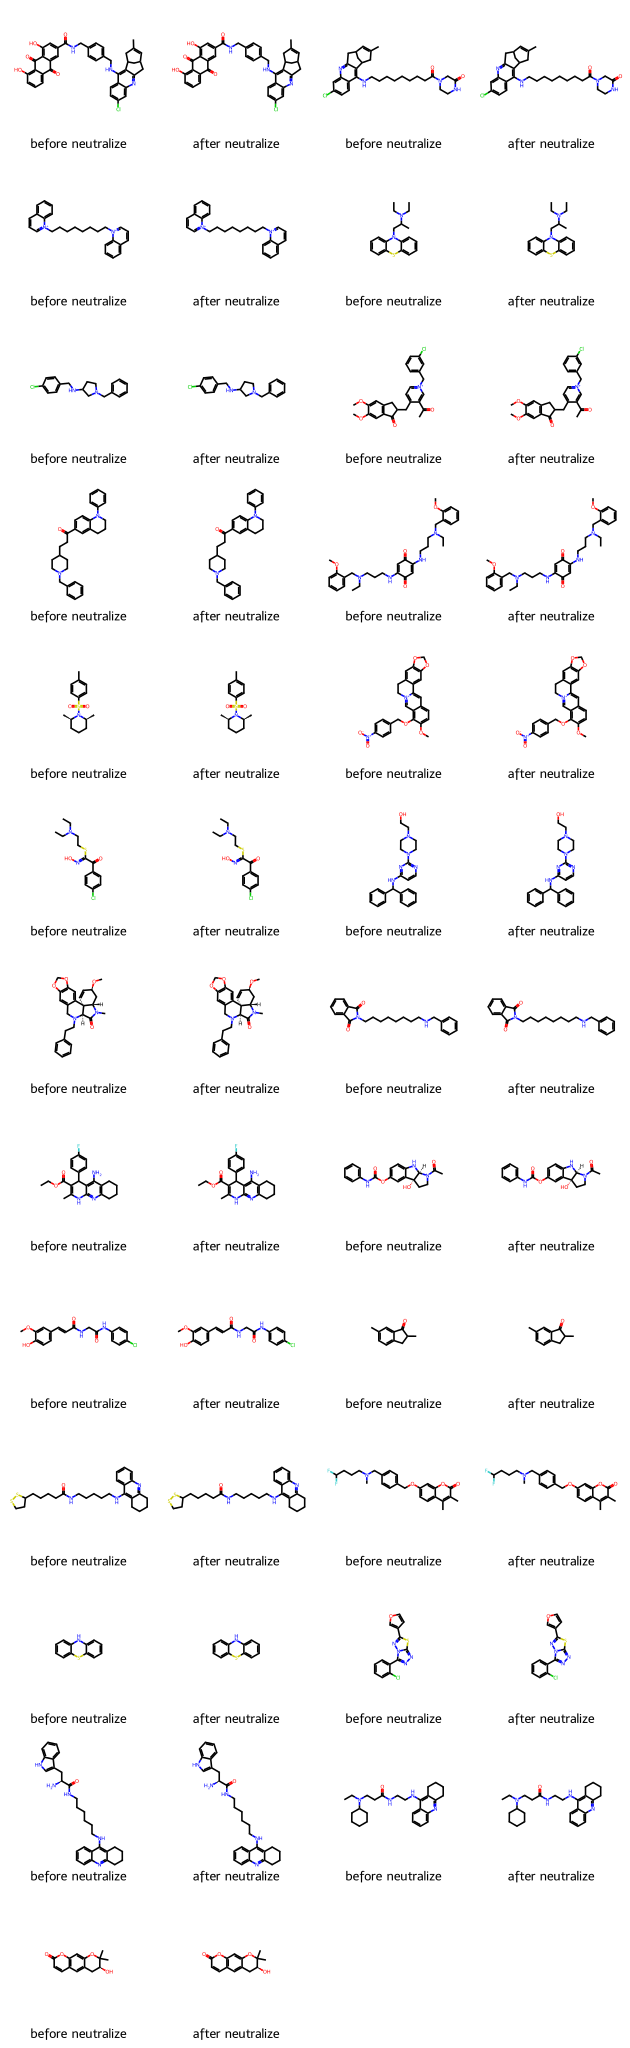

In [201]:
#Neutralization
neutralized = []
neut_legends = []

uncharger = rdMolStandardize.Uncharger()

for i in range(1, len(fragment_parents), 2):
    mol_frag = fragment_parents[i]
    mol_neut = uncharger.uncharge(mol_frag)
    neutralized.extend([mol_frag, mol_neut])
    neut_legends.extend(['before neutralize', 'after neutralize'])

Draw.MolsToGridImage(neutralized, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=neut_legends)

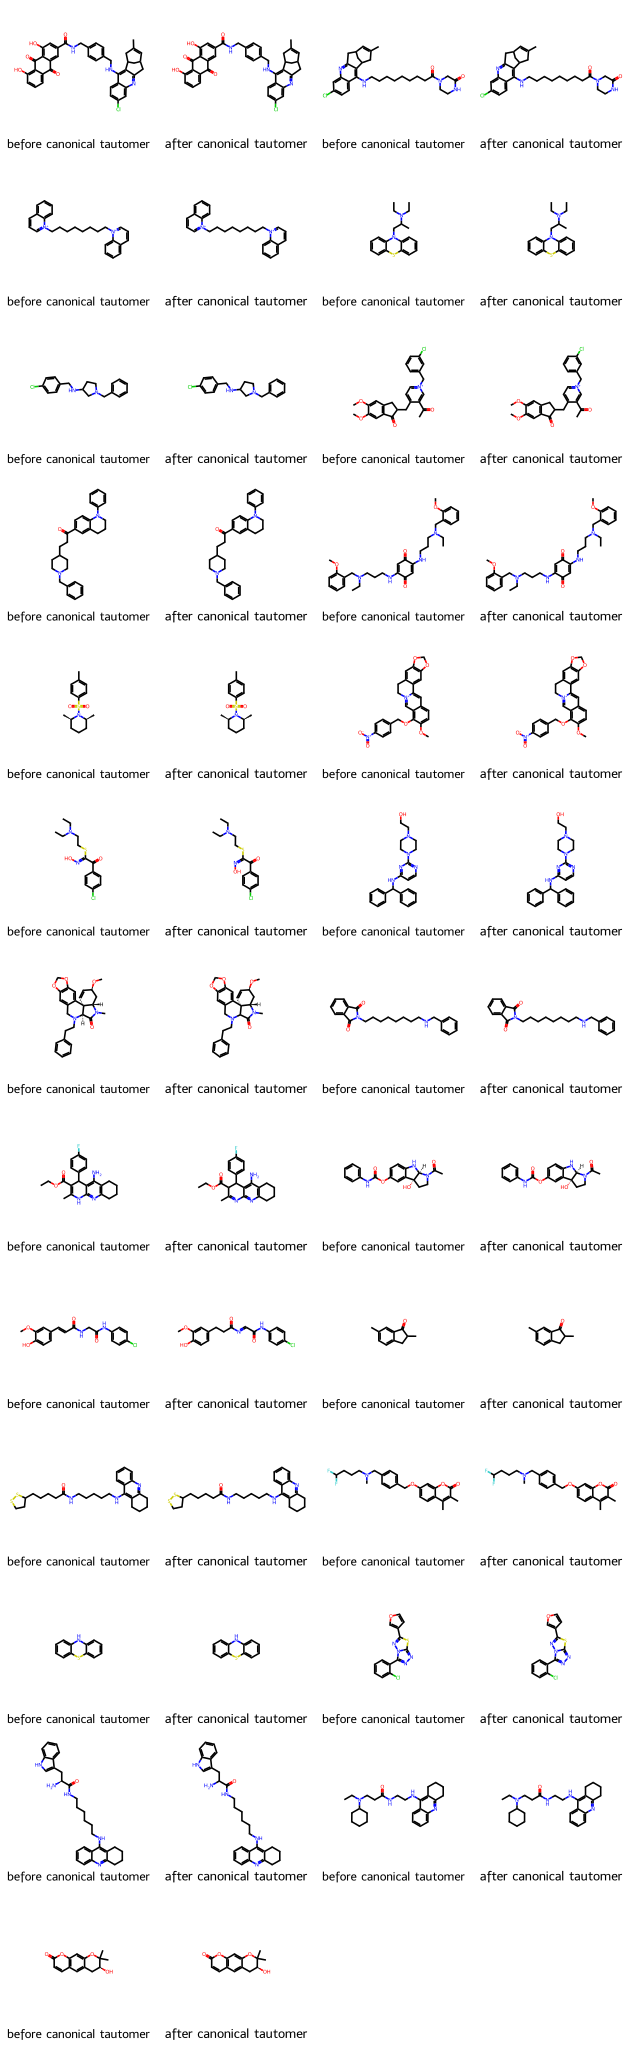

In [202]:
#Canonical Tautomers

canonical_tautomers = []
canon_legend = []

for i in range(1, len(neutralized), 2):
    mol_neut = neutralized[i]
    mol_canon_taut = rdMolStandardize.CanonicalTautomer(mol_neut)
    canonical_tautomers.extend([mol_neut, mol_canon_taut])
    canon_legend.extend(['before canonical tautomer', 'after canonical tautomer'])

Draw.MolsToGridImage(canonical_tautomers, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=canon_legend)

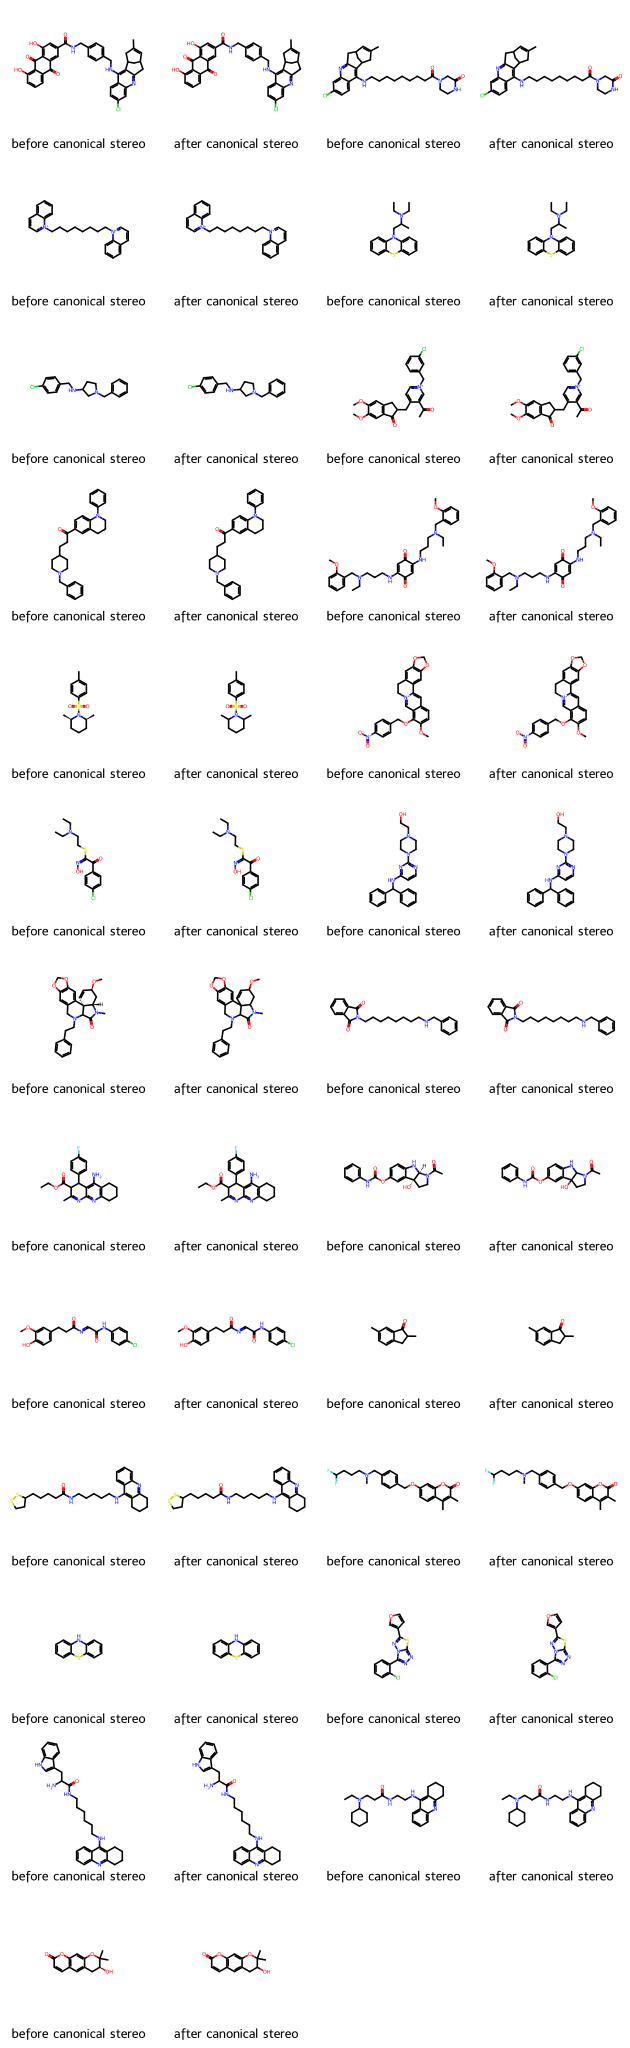

In [203]:
#Stereo Parents
stereo = []
stereo_legends = []

for i in range(1, len(canonical_tautomers), 2):
    canon_mol = canonical_tautomers[i]
    stereo_mol = rdMolStandardize.StereoParent(canon_mol)
    stereo.extend([canon_mol, stereo_mol])
    stereo_legends.extend(['before canonical stereo', 'after canonical stereo'])

Draw.MolsToGridImage(stereo, molsPerRow=4, useSVG=True, subImgSize=(200,200), legends=stereo_legends)

In [204]:
#Add sanitized molecules to the dataset
sanitized_mol = []

for i in range(1, len(stereo), 2):
    mol = stereo[i]
    sanitized_mol.append(mol)

mol_df['Sanitized Molecules'] = sanitized_mol

In [205]:
mol_df

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3         CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732      CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733       CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

         class  Label     pIC50  \
0       active      1 -1.260071   
1       active      1  0.387216   
2       active      1 -1.903090   
3     inactive      0 -6.008600   
4       active      1 -2.250420   
...        ...    ...       ...   
5729    active      1 -0.262451   
5730    active      1 -3.230449   
5731    active      1 -2.714330   
5732  inactive      0 -5.000000   
5733    active      1 -1.913814   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x783ea9953f40>   
1     <rdkit.Chem.rdchem.Mol object at 0x783ea9910270>   
2     <rdkit.Chem.rdchem.Mol object at 0x783ea9910200>   
3     <rdkit.Chem.rdchem.Mol object at 0x783ea99104a0>   
4     <rdkit.Chem.rdchem.Mol object at 0x783ea9910510>   
...                                                ...   
5729  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aac00>   
5730  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab90>   
5731  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab20>   
5732  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaab0>   
5733  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaa40>   

                                   Sanitized Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e00>  
1     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e70>  
2     <rdkit.Chem.rdchem.Mol object at 0x783eaa345ee0>  
3     <rdkit.Chem.rdchem.Mol object at 0x783eaa345f50>  
4     <rdkit.Chem.rdchem.Mol object at 0x783eaa345fc0>  
...                                                ...  
5729  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1bd0>  
5730  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1c40>  
5731  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1cb0>  
5732  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d20>  
5733  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d90>  

[5734 rows x 7 columns]

In [206]:
mol_df.loc[mol_df['canonical_smiles'].str.contains('.')]

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3         CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732      CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733       CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

         class  Label     pIC50  \
0       active      1 -1.260071   
1       active      1  0.387216   
2       active      1 -1.903090   
3     inactive      0 -6.008600   
4       active      1 -2.250420   
...        ...    ...       ...   
5729    active      1 -0.262451   
5730    active      1 -3.230449   
5731    active      1 -2.714330   
5732  inactive      0 -5.000000   
5733    active      1 -1.913814   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x783ea9953f40>   
1     <rdkit.Chem.rdchem.Mol object at 0x783ea9910270>   
2     <rdkit.Chem.rdchem.Mol object at 0x783ea9910200>   
3     <rdkit.Chem.rdchem.Mol object at 0x783ea99104a0>   
4     <rdkit.Chem.rdchem.Mol object at 0x783ea9910510>   
...                                                ...   
5729  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aac00>   
5730  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab90>   
5731  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab20>   
5732  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaab0>   
5733  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaa40>   

                                   Sanitized Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e00>  
1     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e70>  
2     <rdkit.Chem.rdchem.Mol object at 0x783eaa345ee0>  
3     <rdkit.Chem.rdchem.Mol object at 0x783eaa345f50>  
4     <rdkit.Chem.rdchem.Mol object at 0x783eaa345fc0>  
...                                                ...  
5729  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1bd0>  
5730  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1c40>  
5731  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1cb0>  
5732  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d20>  
5733  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d90>  

[5734 rows x 7 columns]

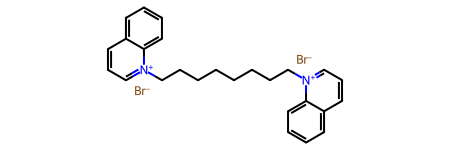

In [207]:
mol_df['Molecule'][2]

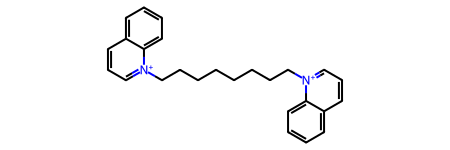

In [208]:
mol_df['Sanitized Molecules'][2]

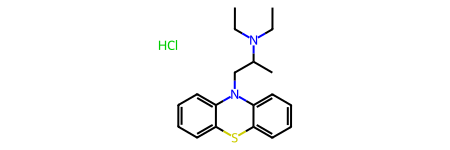

In [209]:
mol_df['Molecule'][3]

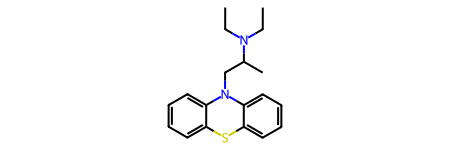

In [210]:
mol_df['Sanitized Molecules'][3]

In [221]:
mol_df['curated_smiles'] = mol_df['Sanitized Molecules'].apply(lambda x: Chem.MolToSmiles(x))

In [222]:
mol_df

molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995  [Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cc...   
3         CHEMBL1200970                CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1n[nH]c2cc(-c3cc...   
5732      CHEMBL5090352  CO[C@H]1C=C2[C@H]3CN(Cc4cc5c(cc43)OCO5)[C@H]2C...   
5733       CHEMBL381926          CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCO[C@@H]1N2C   

         class  Label     pIC50  \
0       active      1 -1.260071   
1       active      1  0.387216   
2       active      1 -1.903090   
3     inactive      0 -6.008600   
4       active      1 -2.250420   
...        ...    ...       ...   
5729    active      1 -0.262451   
5730    active      1 -3.230449   
5731    active      1 -2.714330   
5732  inactive      0 -5.000000   
5733    active      1 -1.913814   

                                              Molecule  \
0     <rdkit.Chem.rdchem.Mol object at 0x783ea9953f40>   
1     <rdkit.Chem.rdchem.Mol object at 0x783ea9910270>   
2     <rdkit.Chem.rdchem.Mol object at 0x783ea9910200>   
3     <rdkit.Chem.rdchem.Mol object at 0x783ea99104a0>   
4     <rdkit.Chem.rdchem.Mol object at 0x783ea9910510>   
...                                                ...   
5729  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aac00>   
5730  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab90>   
5731  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aab20>   
5732  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaab0>   
5733  <rdkit.Chem.rdchem.Mol object at 0x783eaa8aaa40>   

                                   Sanitized Molecules  \
0     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e00>   
1     <rdkit.Chem.rdchem.Mol object at 0x783eaa345e70>   
2     <rdkit.Chem.rdchem.Mol object at 0x783eaa345ee0>   
3     <rdkit.Chem.rdchem.Mol object at 0x783eaa345f50>   
4     <rdkit.Chem.rdchem.Mol object at 0x783eaa345fc0>   
...                                                ...   
5729  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1bd0>   
5730  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1c40>   
5731  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1cb0>   
5732  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d20>   
5733  <rdkit.Chem.rdchem.Mol object at 0x783ead9d1d90>   

                                         curated_smiles  
0     CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...  
1     CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...  
2          c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cccc2ccccc21  
3                      CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21  
4                      Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1  
...                                                 ...  
5729  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...  
5730                           Clc1cccc2c1CN1CCCCCC1=N2  
5731  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1[nH]nc2cc(-c3cc...  
5732  COC1C=C2C3CN(Cc4cc5c(cc43)OCO5)C2CC1OC(=O)c1cc...  
5733                  CCNC(=O)Oc1ccc2c(c1)C1(C)CCOC1N2C  

[5734 rows x 8 columns]

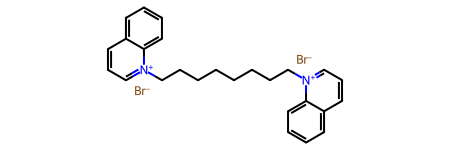

In [223]:
Chem.MolFromSmiles(mol_df['canonical_smiles'][2])

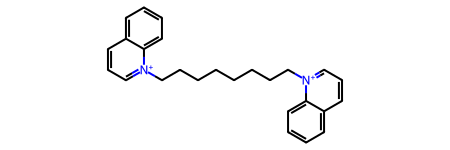

In [225]:
Chem.MolFromSmiles(mol_df['curated_smiles'][2])

## 6. Save Data

In [211]:
mol_df.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'class', 'Label', 'pIC50',
       'Molecule', 'Sanitized Molecules'],
      dtype='object')

In [216]:
mol_df[['molecule_chembl_id', 'canonical_smiles', 'class',
        'Label', 'pIC50', 'Sanitized Molecules']].to_csv('data_class_sanitized.csv', index=False)

In [226]:
columns = ['molecule_chembl_id', 'curated_smiles', 'class', 'Label', 'pIC50']

In [227]:
PandasTools.WriteSDF(mol_df, 'data_class_sanitized.sdf',
                     molColName = 'Sanitized Molecules',
                     properties=columns)